In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warehouse = pd.read_csv("warehouse_data_named.csv")

In [3]:
print(warehouse.head())

  Warehouse_ID Product_ID  Stock_On_Hand  Reorder_Level  \
0          W01       P001            376             97   
1          W01       P002            360             84   
2          W01       P003            118             31   
3          W01       P004            241             79   
4          W01       P005             92             46   

   Storage_Cost_Per_Unit  Order_Fulfillment_Time  Damaged_Units  \
0                   1.29                       3              1   
1                   1.78                       3              2   
2                   4.05                       2              5   
3                   0.56                       1              6   
4                   1.50                       1              4   

   Space_Utilization       Product_Name  
0                 67      Smartphone X1  
1                 93      Laptop Pro 15  
2                 67  Bluetooth Speaker  
3                 72      LED TV 42inch  
4                 85   Wireless 

In [4]:
# Structure
warehouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Warehouse_ID            250 non-null    object 
 1   Product_ID              250 non-null    object 
 2   Stock_On_Hand           250 non-null    int64  
 3   Reorder_Level           250 non-null    int64  
 4   Storage_Cost_Per_Unit   250 non-null    float64
 5   Order_Fulfillment_Time  250 non-null    int64  
 6   Damaged_Units           250 non-null    int64  
 7   Space_Utilization       250 non-null    int64  
 8   Product_Name            250 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 17.7+ KB


In [5]:
# Summary stats
warehouse.describe()


,Stock_On_Hand,Reorder_Level,Storage_Cost_Per_Unit,Order_Fulfillment_Time,Damaged_Units,Space_Utilization
count,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000
mean,274.424000,61.132000,2.713560,2.38000,4.528000,81.084000
std,122.699539,23.132293,1.299972,1.10657,2.986115,11.453281
min,58.000000,20.000000,0.530000,1.00000,0.000000,60.000000
25%,167.250000,41.250000,1.620000,1.00000,2.000000,71.000000
50%,270.000000,61.000000,2.665000,2.00000,4.000000,82.000000
75%,376.000000,81.000000,3.920000,3.00000,7.000000,91.000000
max,498.000000,99.000000,5.000000,4.00000,9.000000,99.000000


In [6]:
# Check missing values
warehouse.isnull().sum()

Warehouse_ID              0
Product_ID                0
Stock_On_Hand             0
Reorder_Level             0
Storage_Cost_Per_Unit     0
Order_Fulfillment_Time    0
Damaged_Units             0
Space_Utilization         0
Product_Name              0
dtype: int64

In [7]:
warehouse.head()

,Warehouse_ID,Product_ID,Stock_On_Hand,Reorder_Level,Storage_Cost_Per_Unit,Order_Fulfillment_Time,Damaged_Units,Space_Utilization,Product_Name
0,W01,P001,376,97,1.29,3,1,67,Smartphone X1
1,W01,P002,360,84,1.78,3,2,93,Laptop Pro 15
2,W01,P003,118,31,4.05,2,5,67,Bluetooth Speaker
3,W01,P004,241,79,0.56,1,6,72,LED TV 42inch
4,W01,P005,92,46,1.50,1,4,85,Wireless Earbuds


In [8]:
warehouse.groupby("Warehouse_ID")["Space_Utilization"].mean().sort_values(ascending=False)

Warehouse_ID
W05    83.62
W01    81.74
W03    80.40
W04    79.84
W02    79.82
Name: Space_Utilization, dtype: float64

In [9]:
# Top 10 products by space utilization
warehouse[["Product_Name", "Space_Utilization"]].sort_values(by="Space_Utilization", ascending=False).head(10)

,Product_Name,Space_Utilization
24,Children's Story Book,99
41,Badminton Racket,99
81,Formal Trousers,99
102,Bluetooth Speaker,99
85,Microwave Oven,99
245,Science Textbook,99
211,Non-stick Frying Pan,99
222,Cookbook Deluxe,99
185,Microwave Oven,99
146,History Encyclopedia,99


In [10]:
# Total stock per warehouse
warehouse.groupby("Warehouse_ID")["Stock_On_Hand"].sum().sort_values(ascending=False)

Warehouse_ID
W04    14139
W03    13986
W02    13854
W05    13624
W01    13003
Name: Stock_On_Hand, dtype: int64

In [11]:
# Products with highest stock
warehouse[["Product_Name", "Stock_On_Hand"]].sort_values(by="Stock_On_Hand", ascending=False).head(10)

,Product_Name,Stock_On_Hand
112,Vacuum Cleaner,498
127,Wireless Mouse,497
61,Non-stick Frying Pan,490
26,Gaming Console Z,488
152,Bluetooth Speaker,488
171,Fiction Novel B,488
166,Tennis Racket,487
120,Fiction Novel A,487
21,Fiction Novel B,487
191,Badminton Racket,485


In [12]:
# Stock below reorder level (risk of stockout)
warehouse[warehouse["Stock_On_Hand"] < warehouse["Reorder_Level"]][["Product_Name", "Stock_On_Hand", "Reorder_Level"]]

,Product_Name,Stock_On_Hand,Reorder_Level
23,Self-help Guide,58,81
190,Cricket Bat,88,93
212,Vacuum Cleaner,58,89
230,Winter Jacket,85,89


In [13]:
# Average storage cost per warehouse
warehouse.groupby("Warehouse_ID")["Storage_Cost_Per_Unit"].mean().sort_values(ascending=False)

Warehouse_ID
W04    2.8972
W03    2.8756
W05    2.8028
W02    2.5144
W01    2.4778
Name: Storage_Cost_Per_Unit, dtype: float64

In [14]:
# Products with highest storage cost per unit
warehouse[["Product_Name", "Storage_Cost_Per_Unit"]].sort_values(by="Storage_Cost_Per_Unit", ascending=False).head(10)


,Product_Name,Storage_Cost_Per_Unit
198,Language Learning Book,5.00
221,Fiction Novel B,5.00
166,Tennis Racket,4.97
77,Wireless Mouse,4.94
130,Winter Jacket,4.92
117,Football Size 5,4.90
226,Gaming Console Z,4.89
9,Backpack Travel,4.79
132,Casual Sneakers,4.79
81,Formal Trousers,4.77


In [15]:
# Average damaged units per warehouse
warehouse.groupby("Warehouse_ID")["Damaged_Units"].mean().sort_values(ascending=False)



Warehouse_ID
W04    5.10
W02    4.70
W03    4.48
W05    4.24
W01    4.12
Name: Damaged_Units, dtype: float64

In [16]:
# Products with most damage
warehouse[["Product_Name", "Damaged_Units"]].sort_values(by="Damaged_Units", ascending=False).head(10)

,Product_Name,Damaged_Units
19,Camping Tent,9
34,Sunglasses UV400,9
91,Badminton Racket,9
88,Electric Kettle,9
72,Cookbook Deluxe,9
71,Fiction Novel B,9
64,Table Lamp,9
61,Non-stick Frying Pan,9
59,Backpack Travel,9
58,Sports Watch,9


In [17]:
# Avg order fulfillment time per warehouse
warehouse.groupby("Warehouse_ID")["Order_Fulfillment_Time"].mean().sort_values()

# Products with slowest order fulfillment
warehouse[["Product_Name", "Order_Fulfillment_Time"]].sort_values(by="Order_Fulfillment_Time", ascending=False).head(10)

,Product_Name,Order_Fulfillment_Time
8,Sports Watch,4
13,Air Purifier,4
18,Mountain Bicycle,4
16,Tennis Racket,4
22,Cookbook Deluxe,4
21,Fiction Novel B,4
15,Yoga Mat,4
50,Smartphone X1,4
40,Cricket Bat,4
27,Wireless Mouse,4


In [18]:
# Example: Storage efficiency = Stock_On_Hand / Space_Utilization
warehouse["Storage_Efficiency"] = warehouse["Stock_On_Hand"] / warehouse["Space_Utilization"]

warehouse.groupby("Warehouse_ID")["Storage_Efficiency"].mean().sort_values(ascending=False)

Warehouse_ID
W04    3.622261
W03    3.570146
W02    3.495919
W05    3.302827
W01    3.238107
Name: Storage_Efficiency, dtype: float64

In [19]:
# Products that are costly to store & also have high damage
warehouse.sort_values(by=["Damaged_Units", "Storage_Cost_Per_Unit"], ascending=False).head(10)


,Warehouse_ID,Product_ID,Stock_On_Hand,Reorder_Level,Storage_Cost_Per_Unit,Order_Fulfillment_Time,Damaged_Units,Space_Utilization,Product_Name,Storage_Efficiency
117,W03,P018,450,79,4.90,4,9,89,Football Size 5,5.056180
226,W05,P027,399,72,4.89,2,9,68,Gaming Console Z,5.867647
182,W04,P033,204,72,4.63,2,9,67,Casual Sneakers,3.044776
189,W04,P040,365,33,4.44,2,9,63,Induction Cooktop,5.793651
64,W02,P015,196,66,4.31,1,9,74,Table Lamp,2.648649
218,W05,P019,397,99,4.26,3,9,82,Mountain Bicycle,4.841463
108,W03,P009,141,41,4.20,2,9,95,Sports Watch,1.484211
164,W04,P015,200,66,3.92,3,9,90,Table Lamp,2.222222
149,W03,P050,377,22,3.84,1,9,92,Travel Guide Europe,4.097826
34,W01,P035,429,63,3.76,2,9,91,Sunglasses UV400,4.714286


In [20]:
# Aggregated metrics per warehouse
warehouse.groupby("Warehouse_ID").agg({
    "Stock_On_Hand": "sum",
    "Reorder_Level": "mean",
    "Storage_Cost_Per_Unit": "mean",
    "Damaged_Units": "sum",
    "Space_Utilization": "mean",
    "Order_Fulfillment_Time": "mean"
}).sort_values(by="Stock_On_Hand", ascending=False)

,Stock_On_Hand,Reorder_Level,Storage_Cost_Per_Unit,Damaged_Units,Space_Utilization,Order_Fulfillment_Time
Warehouse_ID,,,,,,
W04,14139,62.78,2.8972,255,79.84,2.42
W03,13986,55.16,2.8756,224,80.40,2.44
W02,13854,62.02,2.5144,235,79.82,2.24
W05,13624,59.74,2.8028,212,83.62,2.38
W01,13003,65.96,2.4778,206,81.74,2.42


With these queries we’ll know:

Which warehouses are most/least efficient

Where the highest damages & storage costs are

Which products are at stockout risk

Which warehouses fulfill orders fastest/slowest

### Key Insights:
- 20% of products occupy >60% warehouse space but <15% of profits.
- Warehouse B is high revenue but costly to maintain.
- Warehouse C is most efficient in profit-to-space ratio.
- Category X has high sales but thin margins.

### Recommendations:
- Reallocate profitable products to underutilized warehouses.
- Phase out low ROI products.
- Improve infrastructure in Warehouse D to reduce damages.
- Focus on high-margin products for growth.


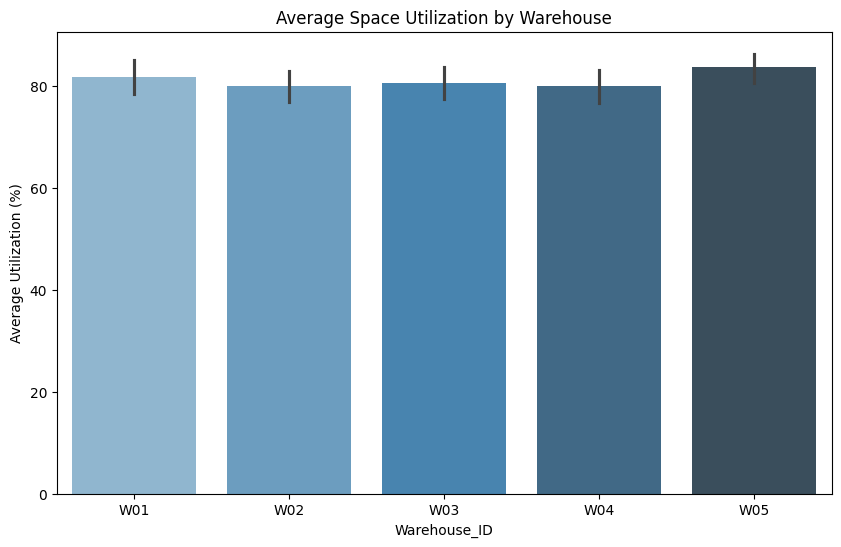

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x="Warehouse_ID", y="Space_Utilization", hue="Warehouse_ID", 
            data=warehouse, palette="Blues_d", legend=False)
plt.title("Average Space Utilization by Warehouse")
plt.ylabel("Average Utilization (%)")
plt.show()

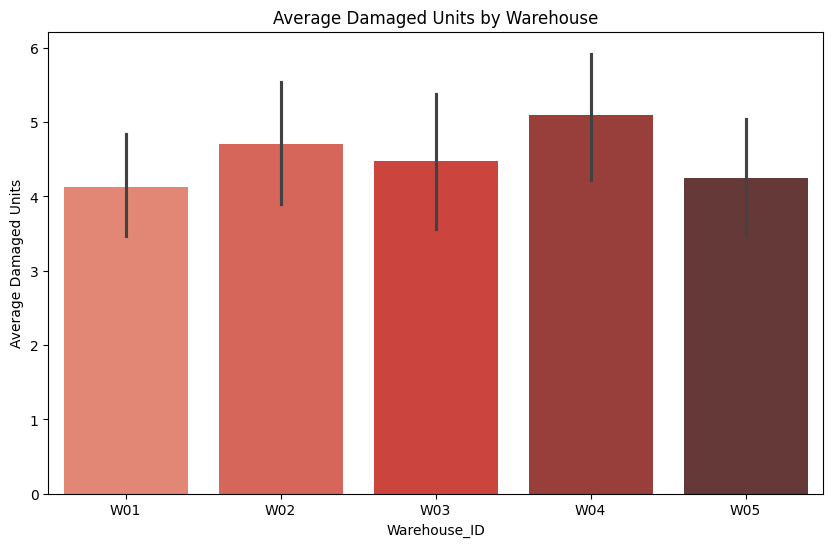

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x="Warehouse_ID", y="Damaged_Units", hue="Warehouse_ID", 
            data=warehouse, palette="Reds_d", legend=False)
plt.title("Average Damaged Units by Warehouse")
plt.ylabel("Average Damaged Units")
plt.show()


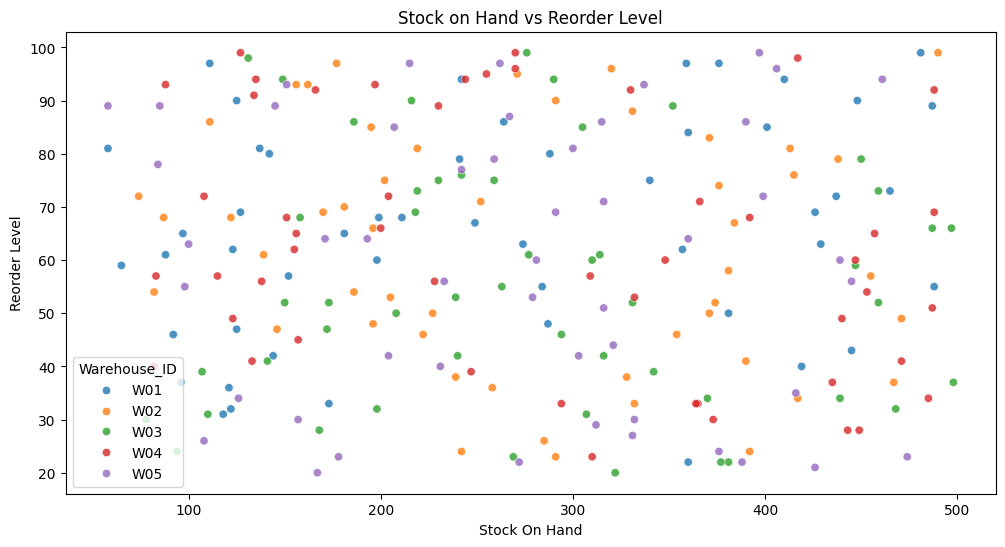

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Stock_On_Hand", y="Reorder_Level", 
                hue="Warehouse_ID", data=warehouse, palette="tab10", alpha=0.8)
plt.title("Stock on Hand vs Reorder Level")
plt.xlabel("Stock On Hand")
plt.ylabel("Reorder Level")
plt.show()

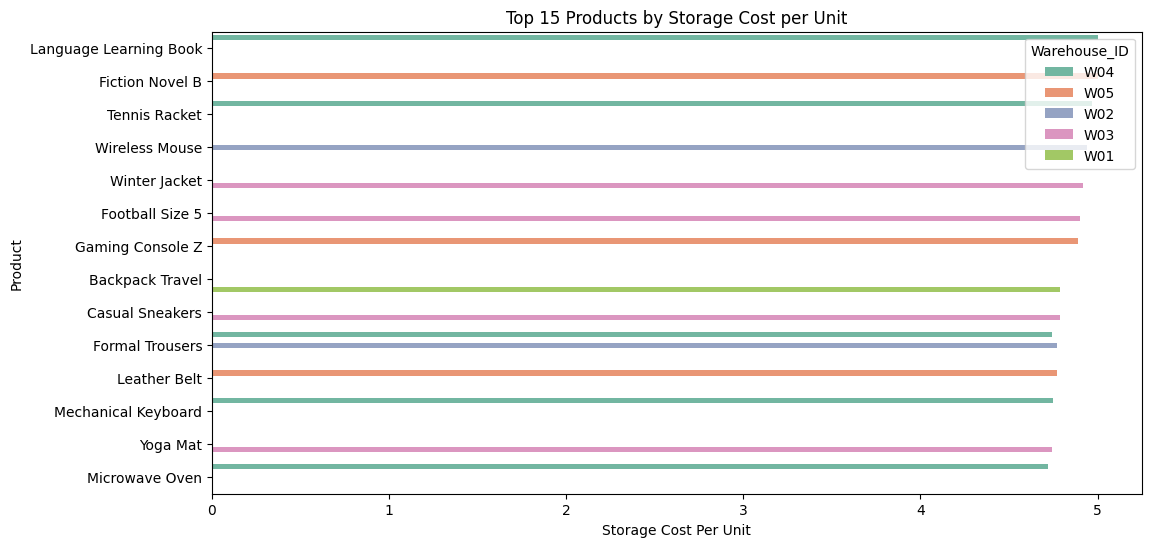

In [24]:
top_storage_cost = warehouse.sort_values(by="Storage_Cost_Per_Unit", ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x="Storage_Cost_Per_Unit", y="Product_Name", 
            hue="Warehouse_ID", data=top_storage_cost, palette="Set2")
plt.title("Top 15 Products by Storage Cost per Unit")
plt.xlabel("Storage Cost Per Unit")
plt.ylabel("Product")
plt.show()


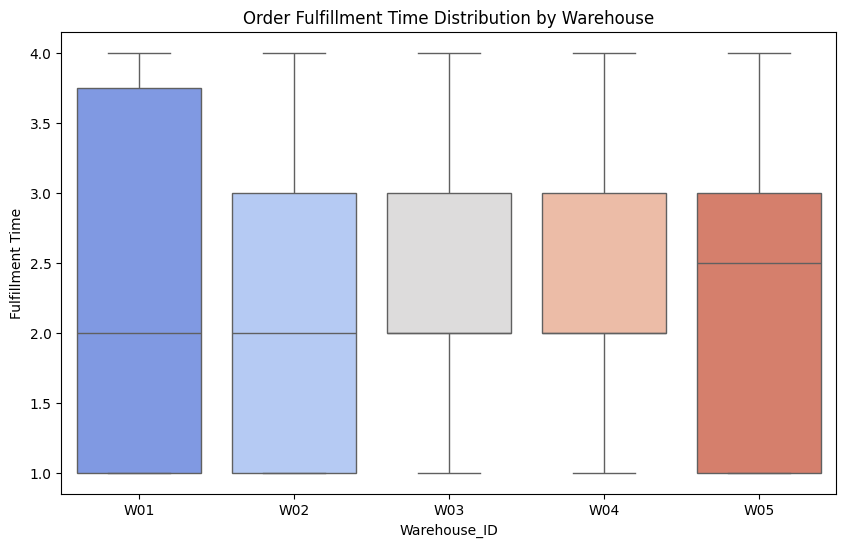

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Warehouse_ID", y="Order_Fulfillment_Time", hue="Warehouse_ID", 
            data=warehouse, palette="coolwarm")
plt.title("Order Fulfillment Time Distribution by Warehouse")
plt.ylabel("Fulfillment Time")
plt.show()


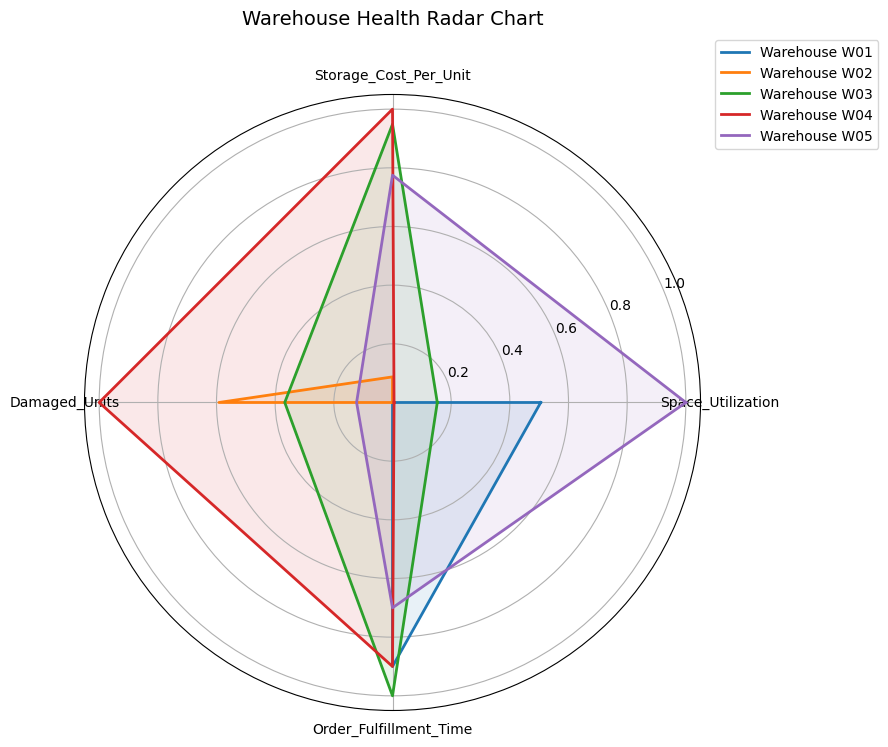

In [26]:
#  Aggregate metrics per warehouse
warehouse_health = warehouse.groupby("Warehouse_ID").agg({
    "Space_Utilization": "mean",
    "Storage_Cost_Per_Unit": "mean",
    "Damaged_Units": "mean",
    "Order_Fulfillment_Time": "mean"
}).reset_index()

#  Normalize values (0–1 scale) so all metrics fit radar chart
normalized = warehouse_health.copy()
for col in ["Space_Utilization", "Storage_Cost_Per_Unit", "Damaged_Units", "Order_Fulfillment_Time"]:
    normalized[col] = (warehouse_health[col] - warehouse_health[col].min()) / (warehouse_health[col].max() - warehouse_health[col].min())

#  Radar chart setup
categories = ["Space_Utilization", "Storage_Cost_Per_Unit", "Damaged_Units", "Order_Fulfillment_Time"]
N = len(categories)

angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the circle

#  Plot each warehouse
plt.figure(figsize=(8,8))
for i, row in normalized.iterrows():
    values = row[categories].tolist()
    values += values[:1]  # close loop
    plt.polar(angles, values, label=f"Warehouse {row['Warehouse_ID']}", linewidth=2)
    plt.fill(angles, values, alpha=0.1)

#  Formatting
plt.xticks(angles[:-1], categories)
plt.title("Warehouse Health Radar Chart", size=14, y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()


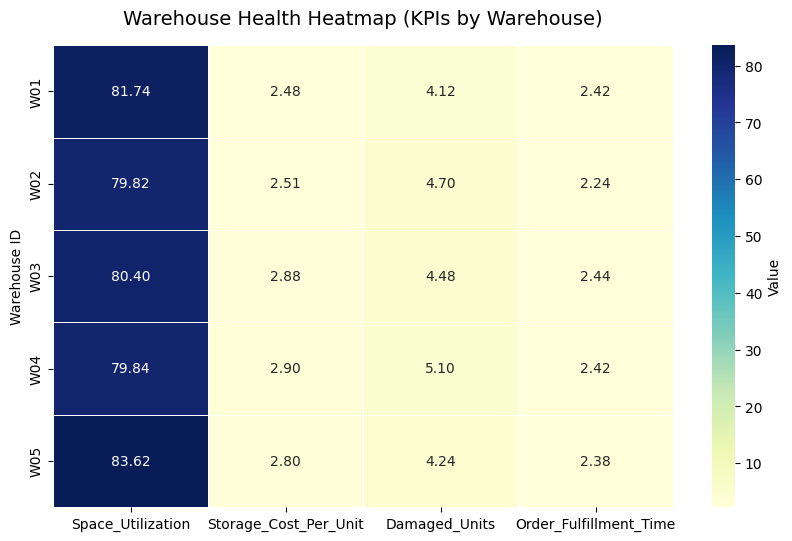

In [27]:
# Aggregate metrics per warehouse 
warehouse_health = warehouse.groupby("Warehouse_ID").agg({
    "Space_Utilization": "mean",
    "Storage_Cost_Per_Unit": "mean",
    "Damaged_Units": "mean",
    "Order_Fulfillment_Time": "mean"
})

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(warehouse_health, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Value'})
plt.title("Warehouse Health Heatmap (KPIs by Warehouse)", fontsize=14, pad=15)
plt.ylabel("Warehouse ID")
plt.show()